In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

import os
import env
import wrangle

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [3]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
1989032,4.0,4.0,2860.0,627027.0,2008.0,7161.36,6059.0
1009013,2.0,1.0,790.0,296452.0,1946.0,4002.79,6037.0
2139176,3.0,3.0,2650.0,494799.0,1978.0,5044.90,6059.0
2020996,3.0,2.0,1651.0,65327.0,1963.0,948.52,6059.0
1399487,4.0,2.0,1419.0,318218.0,1955.0,3834.14,6059.0


### Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [36]:
train_scaled = train.copy()

In [38]:
cols = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'taxamount']
scaler = sklearn.preprocessing.MinMaxScaler()
train_scaled[cols] = scaler.fit_transform(train[cols])
train_scaled.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips,bedrooms_minmax,bathrooms_minmax,square_feet_minmax,tax_value_minmax,taxamount_minmax
1989032,0.2500,0.20,0.787386,0.643491,2008.0,0.678837,6059.0,4.0,4.0,2860.0,627027.0,7161.36
1009013,0.1250,0.05,0.217296,0.304224,1946.0,0.379166,6037.0,2.0,1.0,790.0,296452.0,4002.79
2139176,0.1875,0.15,0.729551,0.507786,1978.0,0.478037,6059.0,3.0,3.0,2650.0,494799.0,5044.90
2020996,0.1875,0.10,0.454420,0.067022,1963.0,0.089390,6059.0,3.0,2.0,1651.0,65327.0,948.52
1399487,0.2500,0.10,0.390526,0.326562,1955.0,0.363165,6059.0,4.0,2.0,1419.0,318218.0,3834.14


In [60]:
def visualize_scaler(scaler, df, cols, bins=10):
    fig, axs = plt.subplots(len(cols), 2, figsize=(18,12))
    df_scaled = df.copy()
    df_scaled[cols] = scaler.fit_transform(df[cols])
    for (ax1, ax2), col in zip(axs, cols):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

### Min-Max

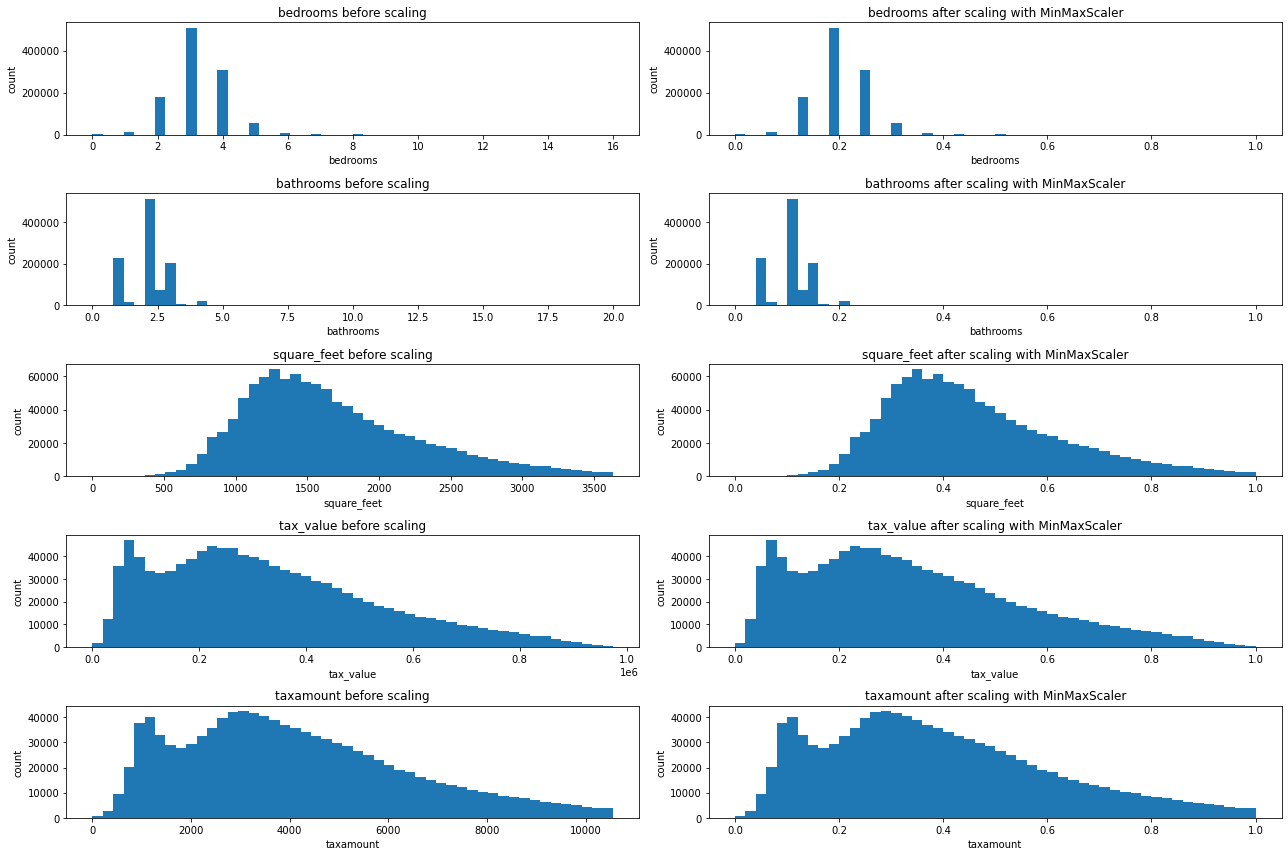

In [61]:
# MinMaxScaler Applied
visualize_scaler(scaler=sklearn.preprocessing.MinMaxScaler(), 
                 df=train, 
                 cols=cols, 
                 bins=50)

### Standard

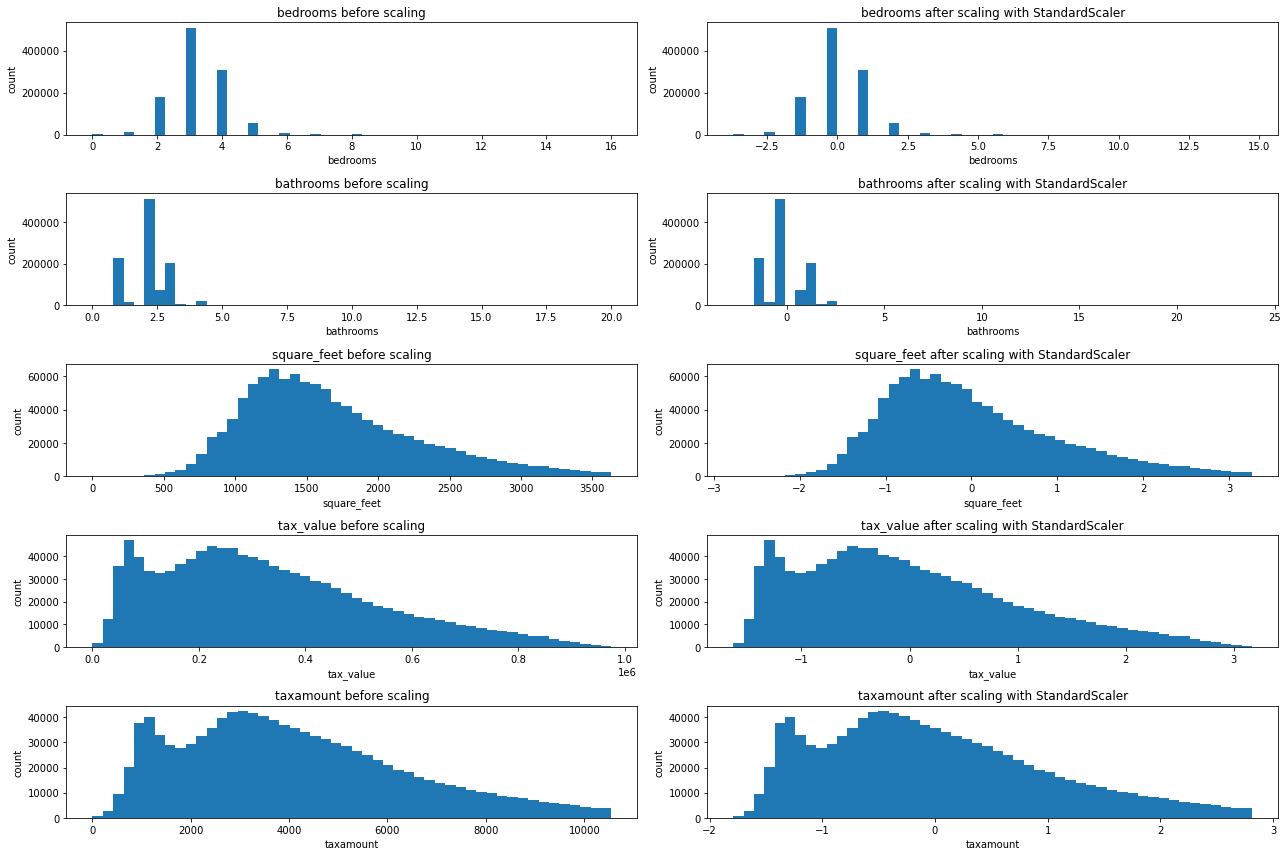

In [62]:
# StandardScaler Applied
visualize_scaler(scaler=sklearn.preprocessing.StandardScaler(), df=train, cols=cols, bins=50)


### Robust

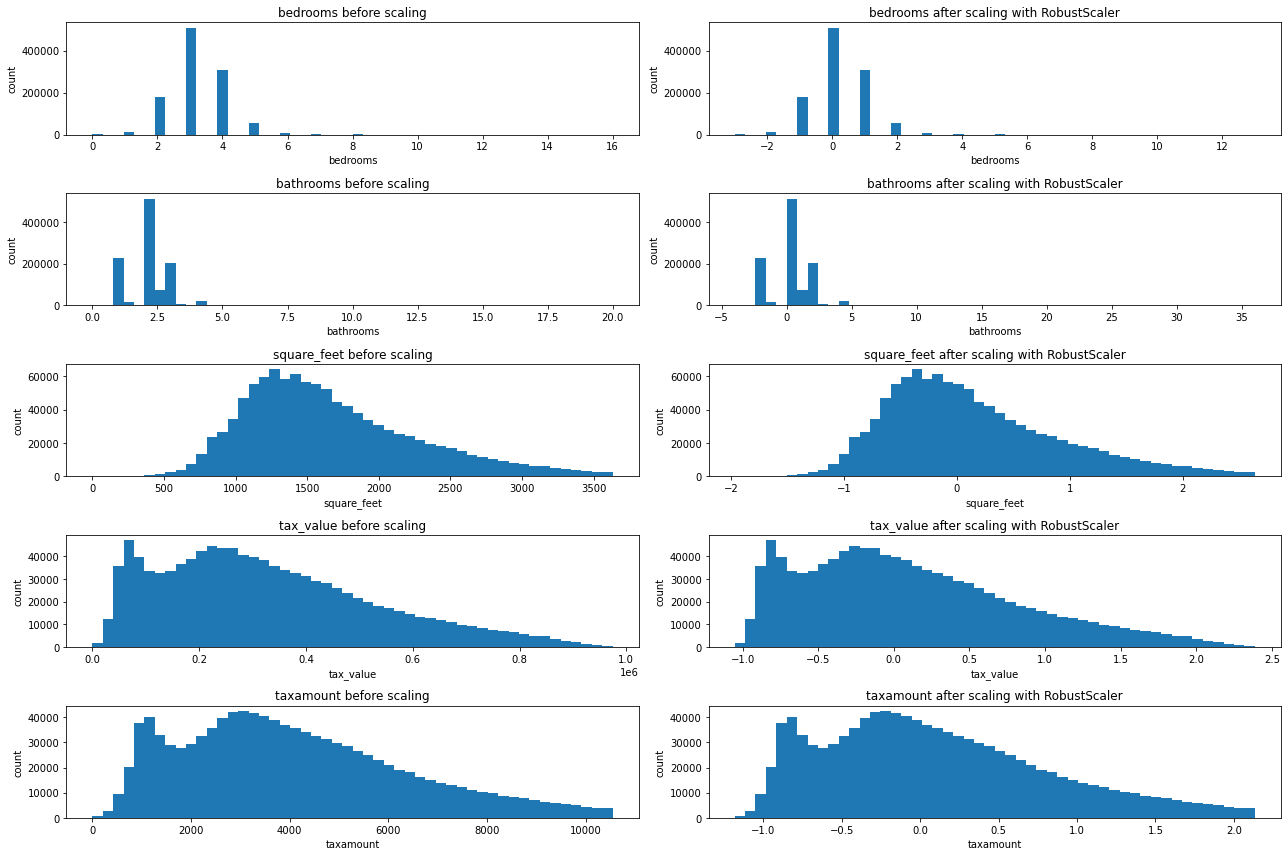

In [63]:
# RobustScaler Applied
visualize_scaler(scaler=sklearn.preprocessing.RobustScaler(), df=train, cols=cols, bins=50)


### Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [32]:
scaler = sklearn.preprocessing.MinMaxScaler()
train[['bedrooms_minmax', 'bathrooms_minmax', 'square_feet_minmax', 'tax_value_minmax', 'taxamount_minmax']] = scaler.fit_transform(train[['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'taxamount']])
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[['bedrooms_minmax', 'bathrooms_minmax', 'square_feet_minmax', 'tax_value_minmax', 'taxamount_minmax']])
train[['bedrooms_minmax', 'bathrooms_minmax', 'square_feet_minmax', 'tax_value_minmax', 'taxamount_minmax']] = scaler.inverse_transform(train[['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'taxamount']])


Text(0.5, 1.0, 'Scaled Bedrooms')

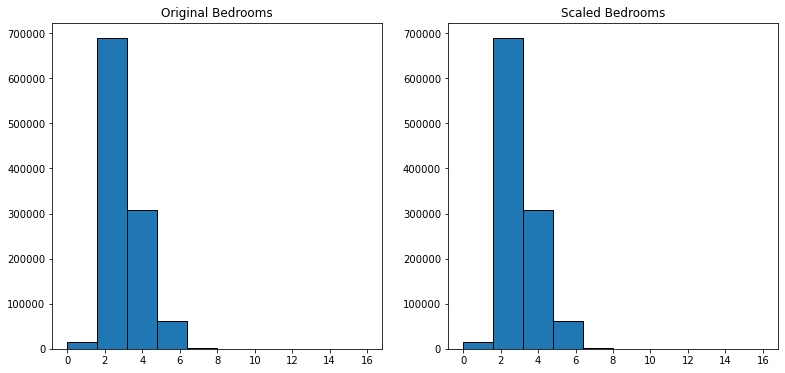

In [33]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.bedrooms, ec='black')
plt.title('Original Bedrooms')
plt.subplot(122)
plt.hist(train.bedrooms_minmax, ec='black')
plt.title('Scaled Bedrooms')

Text(0.5, 1.0, 'Scaled Bathrooms')

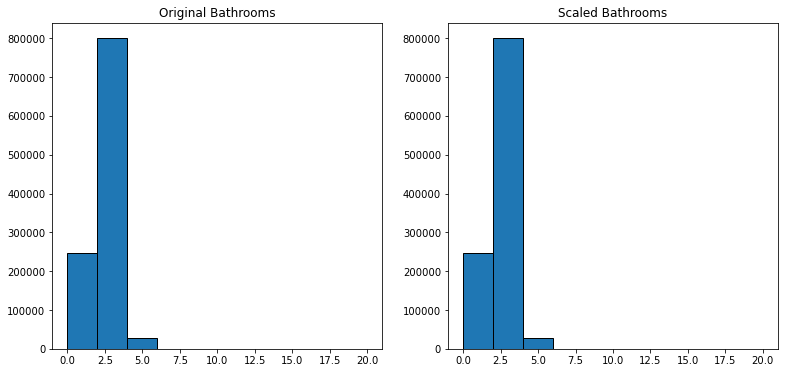

In [34]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.bathrooms, ec='black')
plt.title('Original Bathrooms')
plt.subplot(122)
plt.hist(train.bathrooms_minmax, ec='black')
plt.title('Scaled Bathrooms')

### Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

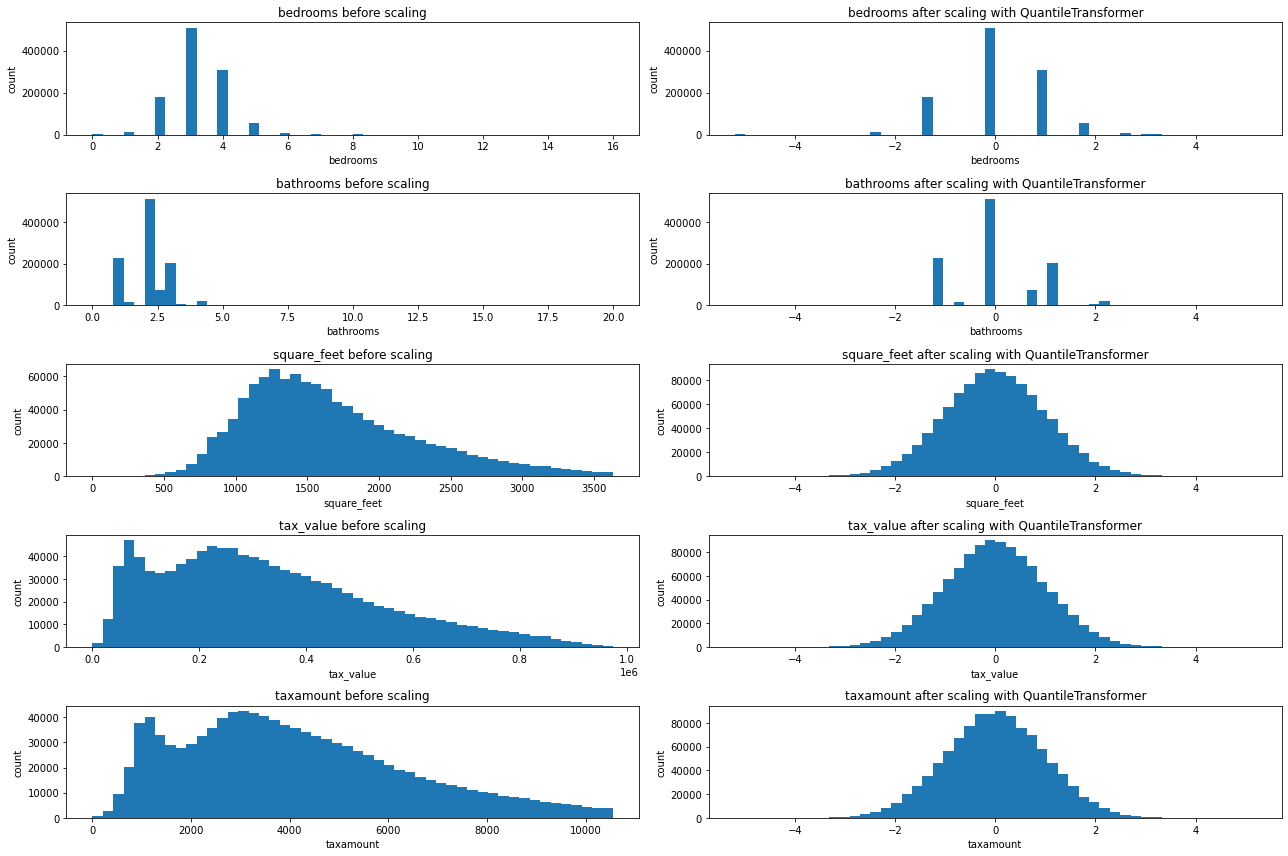

In [64]:
# QuantileTransformer Applied
visualize_scaler(scaler=sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 cols=cols, 
                 bins=50)

In [58]:
def scale_data(train, 
               validate, 
               test, 
               cols = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'taxamount']):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()
    #     fit the thing
    scaler.fit(train[cols])
    # applying the scaler:
    train_scaled[cols] = pd.DataFrame(scaler.transform(train[cols]),
                                                  columns=train[cols].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[cols] = pd.DataFrame(scaler.transform(validate[cols]),
                                                  columns=validate[cols].columns.values).set_index([validate.index.values])
    
    test_scaled[cols] = pd.DataFrame(scaler.transform(test[cols]),
                                                 columns=test[cols].columns.values).set_index([test.index.values])
    return train_scaled, validate_scaled, test_scaled

In [59]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)
